## Exploratory Data Analysis

In [76]:
# Libraries
# General purpose
import os
import sys
import datetime
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
# Retina
%config InlineBackend.figure_format = 'retina'

## 1. Pose questions

### 1.1 What does Close mean?
### 1.2 What does High mean?
### 1.3 What does Low mean?
### 1.4 What does Open mean?
An open-high-low-close chart (also OHLC) is a type of chart typically used to illustrate movements in the price of a financial instrument over time. <br>
*More info: * https://en.wikipedia.org/wiki/Open-high-low-close_chart

### 1.5 What is the range of the timestamps?

### 1.6 What does Volume_(BTC) mean?
The number of transactions made in that data point.

### 1.7 What does Volume_(Currency) mean?
####Ori####

### 1.8 What does weighted_price mean?
The price of the bitcoin divided by the total amount of minutes in one day which should be: <br> min_day = 1d*(24h/1d)*(60/1h) = 10*60+10*60+4*60 = 1440 minutes.  <br>So, if the price of bitcoin is say bit_price_1_3_2018 = 14569, then <br>
                    weighted_price = bit_price_1_3_2018/min_day = 10.11 <br>
Makes sense.

### 1.9 How many rows in the dataset experience change of Close, High, Low or Open during a timestamp? Does the volumes variables show correlation? 
Stupid question, tells us nothing.

### 1.10 What is the distribution of the prices with respect to the timestamps?

### 1.11 Obviously the tendency of the data goes up let's say every month. Then when does the falls happen? What is the gap time? Is there unidemsional or multidimensional correlation with other variables?

### 1.12 At a first glance the data seems to depend on a series of past events, just like any other stock price prediction problem. Nonetheless, which is the correct amount of time to take for the RNN? 

## 2. Data wrangling
### 2.1 Get data

In [77]:
df = pd.read_excel("data/data_reduced_datetime_processed.xlsx")
df2 = pd.read_excel("data/reduced_data_101529.xlsx")

In [78]:
print("Dataframe size: {}".format(df.shape))
df.head()

Dataframe size: (101529, 12)


,Close,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,day,hour,minute,month,year
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,3,52,12,2011
1,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,4,22,12,2011
2,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,4,52,12,2011
3,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,5,22,12,2011
4,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,5,52,12,2011


There is no need to check for outliers since we have done that when resampling the data. We did not find any outlier. 

## 2. Exploratory data analysis

### 2.1 What is the range of the timestamps?
I want to know which are the exact dates of the data points. When does it start? When does it finish? Is the data complete, I mean for every day in the range? Are there gaps?

In [79]:
sd = df.iloc[0, :]
ed = df.iloc[df.shape[0]-1, :]
print("Starting date: {}-{}-{} ::: {}:{}".format(sd["year"], sd["month"], sd["day"], sd["hour"], sd["minute"]))
print("Final date: {}-{}-{} ::: {}:{}".format(ed["year"], ed["month"], ed["day"], ed["hour"], ed["minute"]))

Starting date: 2011.0-12.0-31.0 ::: 3.0:52.0
Final date: 2017.0-10.0-19.0 ::: 19.0:44.0


In [80]:
def get_readable_timestamp(timestamp):
    """
    Transforms a unix timestamp into a readable format and puts it in a list
    Args:
        timestamp: input string that contains the unix timestamp
    Returns:
        returns a list that contains the processed timestamp in the following format:
        [year, month, day, hour, minute]
    """
    formatted_timestamp = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y,%m,%d,%H,%M,%S')
    list_formatted_timestamp = formatted_timestamp.split(",")
    return list_formatted_timestamp

print("Starting date: {}".format(get_readable_timestamp(df2.iloc[0, :]["Timestamp"])))
print("Final date: {}".format(get_readable_timestamp(df2.iloc[df.shape[0]-1, :]["Timestamp"])))

Starting date: ['2011', '12', '31', '03', '52', '00']
Final date: ['2017', '10', '19', '19', '44', '00']


The data starts at 12/31/2011 and ends at 10/19/2017. 

In [81]:
# How many points do we have per day?
years = [i for i in range(2012, 2018)]
months = [i for i in range(1, 13)]
days = []
# Iterate
for year in range(2012, 2018):
    print("Year {}".format(year))
    for month in range(1, 13):
        print("Month: {}".format(month))
        filtered = df.query("year == @year & month == @month")
        monthly_data_points = len(filtered)
        days.append(monthly_data_points)
        #print("Number of days: {}".format(filtered))
        print("Data points per month: {}".format(len(filtered)))

Year 2012
Month: 1
Data points per month: 1488
Month: 2
Data points per month: 1392
Month: 3
Data points per month: 1488
Month: 4
Data points per month: 1440
Month: 5
Data points per month: 1488
Month: 6
Data points per month: 1440
Month: 7
Data points per month: 1488
Month: 8
Data points per month: 1488
Month: 9
Data points per month: 1440
Month: 10
Data points per month: 1488
Month: 11
Data points per month: 1440
Month: 12
Data points per month: 1488
Year 2013
Month: 1
Data points per month: 1488
Month: 2
Data points per month: 1344
Month: 3
Data points per month: 1488
Month: 4
Data points per month: 1440
Month: 5
Data points per month: 1488
Month: 6
Data points per month: 1440
Month: 7
Data points per month: 1488
Month: 8
Data points per month: 1488
Month: 9
Data points per month: 1440
Month: 10
Data points per month: 1488
Month: 11
Data points per month: 1440
Month: 12
Data points per month: 1488
Year 2014
Month: 1
Data points per month: 1488
Month: 2
Data points per month: 1344
Mo

### What is the tendency of the data with respect to different gaps of time?

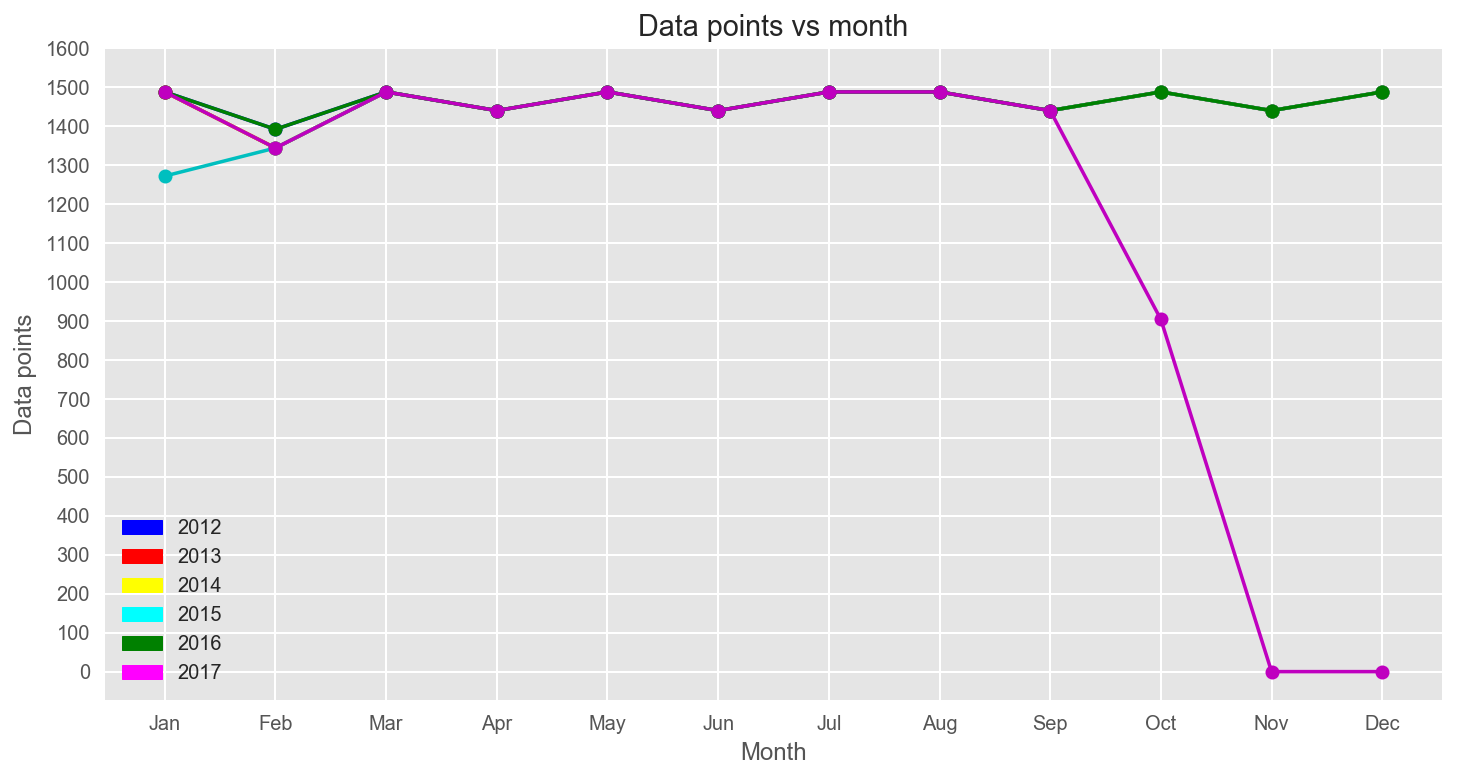

In [82]:
import matplotlib.patches as mpatches
# Variables
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
num_months = [i for i in range(len(months))]
# Plot
a = plt.plot(num_months, days[:12], color = "b", marker = 'o', label = "2012")
b = plt.plot(num_months, days[12:24], color = "r", marker = 'o', label = "2013")
c = plt.plot(num_months, days[24:36], color = "y", marker = 'o', label = "2014")
d = plt.plot(num_months, days[36:48], color = "c", marker = 'o', label = "2015")
e = plt.plot(num_months, days[48:60], color = "g", marker = 'o', label = "2016")
f = plt.plot(num_months, days[60:72], color = "m", marker = 'o', label = "2017")
plt.xticks(num_months, months)
plt.yticks(np.arange(0, 1700, 100))
plt.title("Data points vs month")
plt.xlabel("Month")
plt.ylabel("Data points")
### Legend
v2012 = mpatches.Patch(color='blue', label = '2012')
v2013 = mpatches.Patch(color='red', label = '2013')
v2014 = mpatches.Patch(color='yellow', label = '2014')
v2015 = mpatches.Patch(color='cyan', label = '2015')
v2016 = mpatches.Patch(color='green', label = '2016')
v2017 = mpatches.Patch(color='magenta', label = '2017')
plt.legend(handles=[v2012, v2013, v2014, v2015, v2016, v2017])
plt.show()

Given the previous chart, we can see the data points are similar to each other for almost every month of every year. <br>
The odd one is 2017 that has less data points in October because the data ends at 10/19/2017. Also, the data for the following 2 months is zero because there is no data. <br>
February 2017 also seems to have a few less data points, but we don't worry about that. The same for January 2015. <br>
We can conclude that if the data is used as a data set, then we have balanced data and a lot of data points. 

### Price analysis
We want to analyse the distribution of the price with respect to minutes,\
hours, days, months and years. Let's plot them.

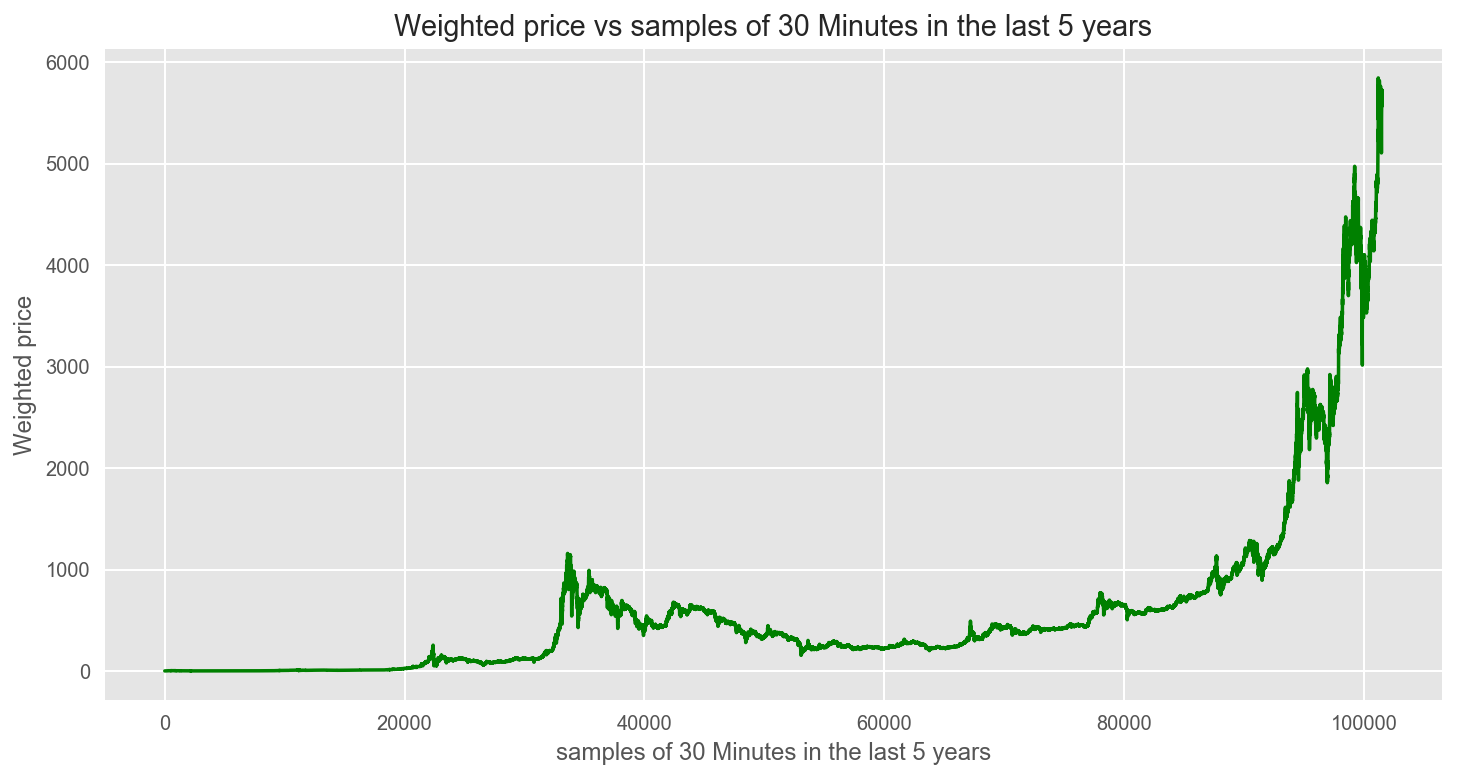

In [83]:
# Plot with respect to minutes, remember we have a sample each 30 minutes. 
# Thus, the plot would be with respect to each half hour from 2012 to 2017.
plt.plot([i for i in range(df.shape[0])], df["Weighted_Price"], color = "g")
plt.title("Weighted price vs samples of 30 Minutes in the last 5 years")
plt.xlabel("samples of 30 Minutes in the last 5 years")
plt.ylabel("Weighted price")
plt.show()

Nice curve, we can see the tendency is almost always going up. There is an interesting fall around the 40000 point. Other falls seem to be located in small time gaps. THey have to be investigated. <br>
As an addition, the x axis is hard to understand, let's try to make it more clear adding other date times.

In [84]:
### Define months in the last five years
# Variables
months_five_years = []
for year in range(12, 18):
    for m in months:
        months_five_years.append(m[0])#+str(year)[1])
# Remove the last two months of 2017
months_five_years = months_five_years[:-2]
num_months_five_years = [i for i in range(len(months_five_years))]
#print(months_five_years)

### Let's get the points of each month from the dataframe
wprice_months_five_years = []
for year in range(2012, 2018):
    for month in range(1, 13):
        psmonth = df.query("year == @year & month == @month")["Weighted_Price"]
        wprice_months_five_years.append(psmonth.sum())
wprice_months_five_years = wprice_months_five_years[:-2]        
#print(wprice_months_five_years)

### Tests
print(len(wprice_months_five_years))
print(len(num_months_five_years), len(months_five_years))

70
70 70


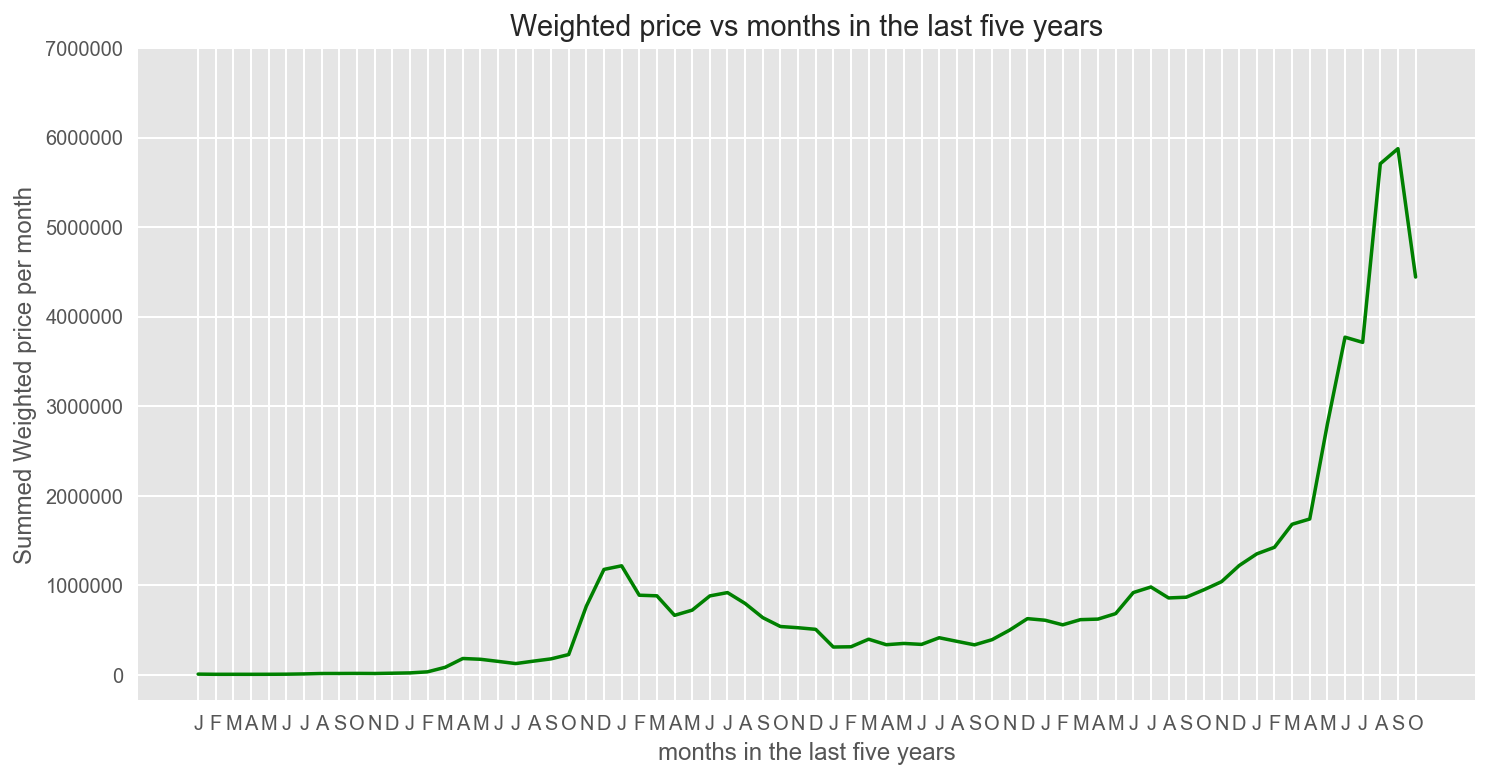

In [85]:
# Plot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.rcParams["figure.figsize"] = [12, 6]

plt.plot(num_months_five_years, wprice_months_five_years, color = "g")
plt.xticks(num_months_five_years, months_five_years)
plt.yticks(np.arange(0, 8000000, 1000000))
plt.title("Weighted price vs months in the last five years")
plt.xlabel("months in the last five years")
plt.ylabel("Summed Weighted price per month")
plt.show()

## TO DO: Fix the xtick's font size and add the year.  
I love this plot, we have a smoother curve which is nice and we also get to understand the x axis (the fontsize has to be tuned tough). <br>
Let's make one more plot illustrating the price per year. 

In [86]:
# Variables
years = [i for i in range(2011, 2018)]
wprice_years = []
# Let's filter each years price
for year in years:
    psyear = df.query("year == @year")["Weighted_Price"]
    wprice_years.append(psyear.sum())
# Tests
print(wprice_years)

[184.17000000000013, 144755.46723803386, 3289351.7921197675, 9204142.221923705, 4710592.323419589, 9944362.546559922, 32527646.059771504]


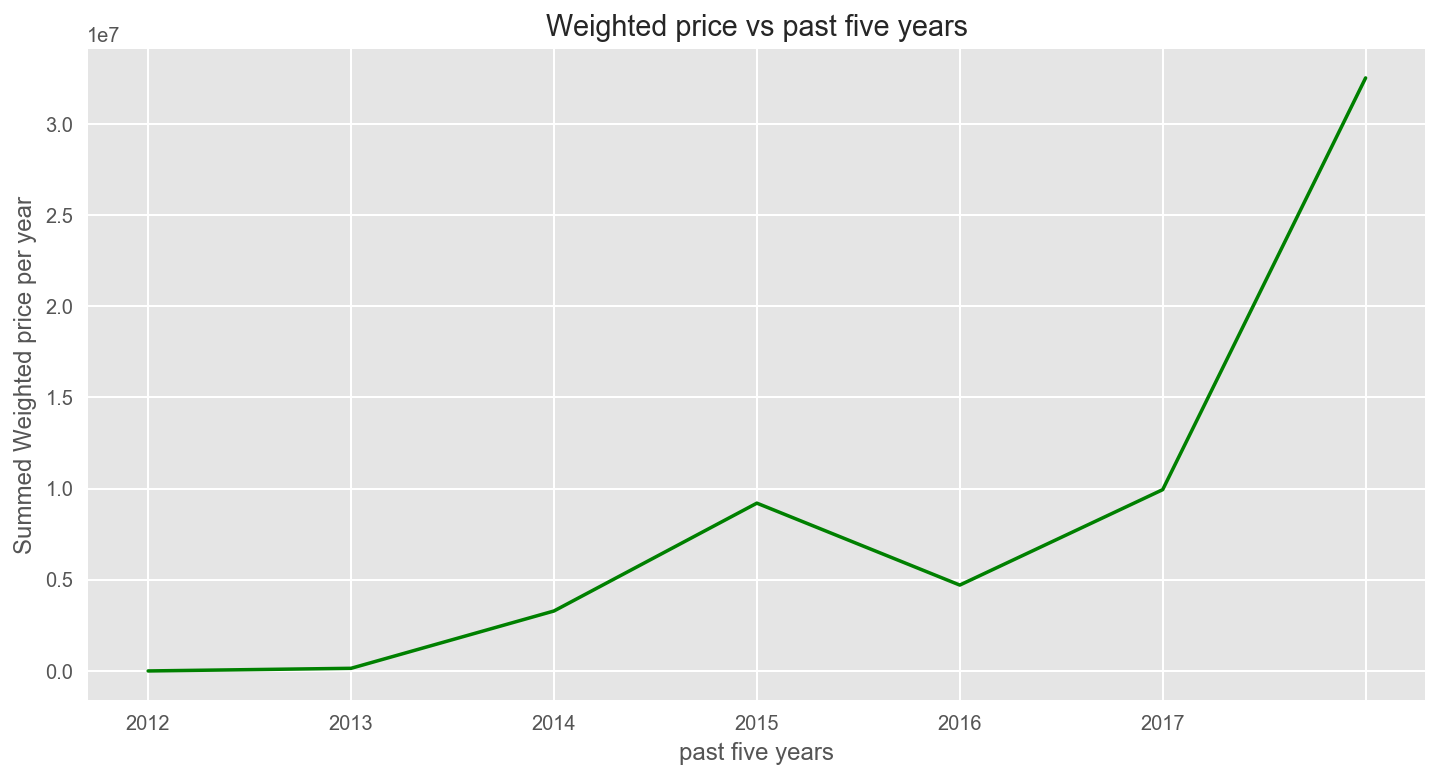

In [87]:
# Plot
plt.plot(years, wprice_years, color = "g")
plt.xticks(years, ["2012", "2013", "2014", "2015", "2016", "2017"])
#plt.yticks(np.arange(0, 5000000, 1000000))
plt.title("Weighted price vs past five years")
plt.xlabel("past five years")
plt.ylabel("Summed Weighted price per year")
plt.show()

The graphics are of great help to understand the tendency of the data. As we have seen in the last plot, there was a fall in 2014-2015 which mean that we should analyse further that gap of time to understand why the price fell. On the other hand, the rest of the years show the price increases. 2016-2017 seems to be the greatest explosion in bitcoin.

In [88]:
df.head()

,Close,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,day,hour,minute,month,year
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,3,52,12,2011
1,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,4,22,12,2011
2,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,4,52,12,2011
3,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,5,22,12,2011
4,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,31,5,52,12,2011


### How does the weighted price look like against Volume_(Currency)?

In [89]:
# Let's take a look at Volume_(Currency) first
print("Some stats: ...")
df["Volume_(Currency)"].describe()

Some stats: ...


count    1.015290e+05
mean     5.493279e+03
std      2.426520e+04
min      0.000000e+00
25%      6.224937e+01
50%      3.212688e+02
75%      2.104505e+03
max      1.234686e+06
Name: Volume_(Currency), dtype: float64

This time series is highly distributed in the fourth quartile which will cause problems in a boxplot visualization due to the high values stored in that quartile. So, let's cut those values and try to plot them separately.

In [90]:
# Swarm or box plots rather
# df_filtered = df.query("Volume$$Currency$ < 2104")
df_filtered_3_4_q = df[df["Volume_(Currency)"] < 2104]
df_filtered_4_4_q = df[df["Volume_(Currency)"] > 2104]
# Test
print(df_filtered_3_4_q.shape)
print(df_filtered_4_4_q["Volume_(Currency)"].shape)

(76143, 12)
(25386,)


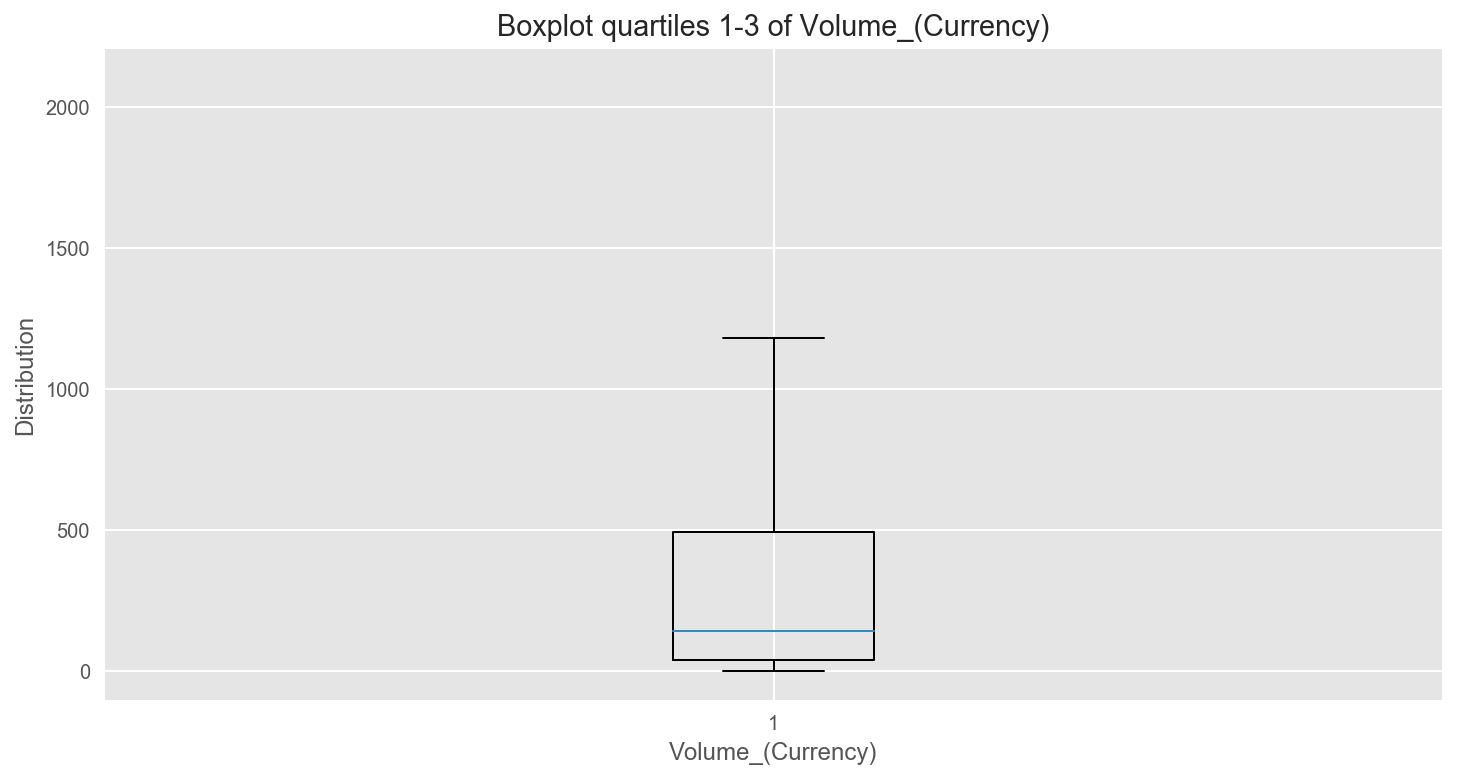

In [91]:
plt.boxplot(df_filtered_3_4_q["Volume_(Currency)"])
plt.title("Boxplot quartiles 1-3 of Volume_(Currency)")
plt.xlabel("Volume_(Currency)")
plt.ylabel("Distribution")
# plt.yticks(np.arange(0, 2500, 100))
plt.show()

In [92]:
# df_filtered_4_4_q["Volume_(Currency)"].plot()
# plt.boxplot(df_filtered_4_4_q["Volume_(Currency)"])
# plt.title("Boxplot quartile 4 of Volume_(Currency)")
# plt.xlabel("Volume_(Currency)")
# plt.ylabel("Distribution")
# plt.yticks(np.arange(0, 2500, 100))
# plt.show()
# I give up, thsi does not work

Volume_(Currency) seems to be concentrated in values around 500 or less. In this sense, high values might be indicators of change. Let's plot them with respect to dates.

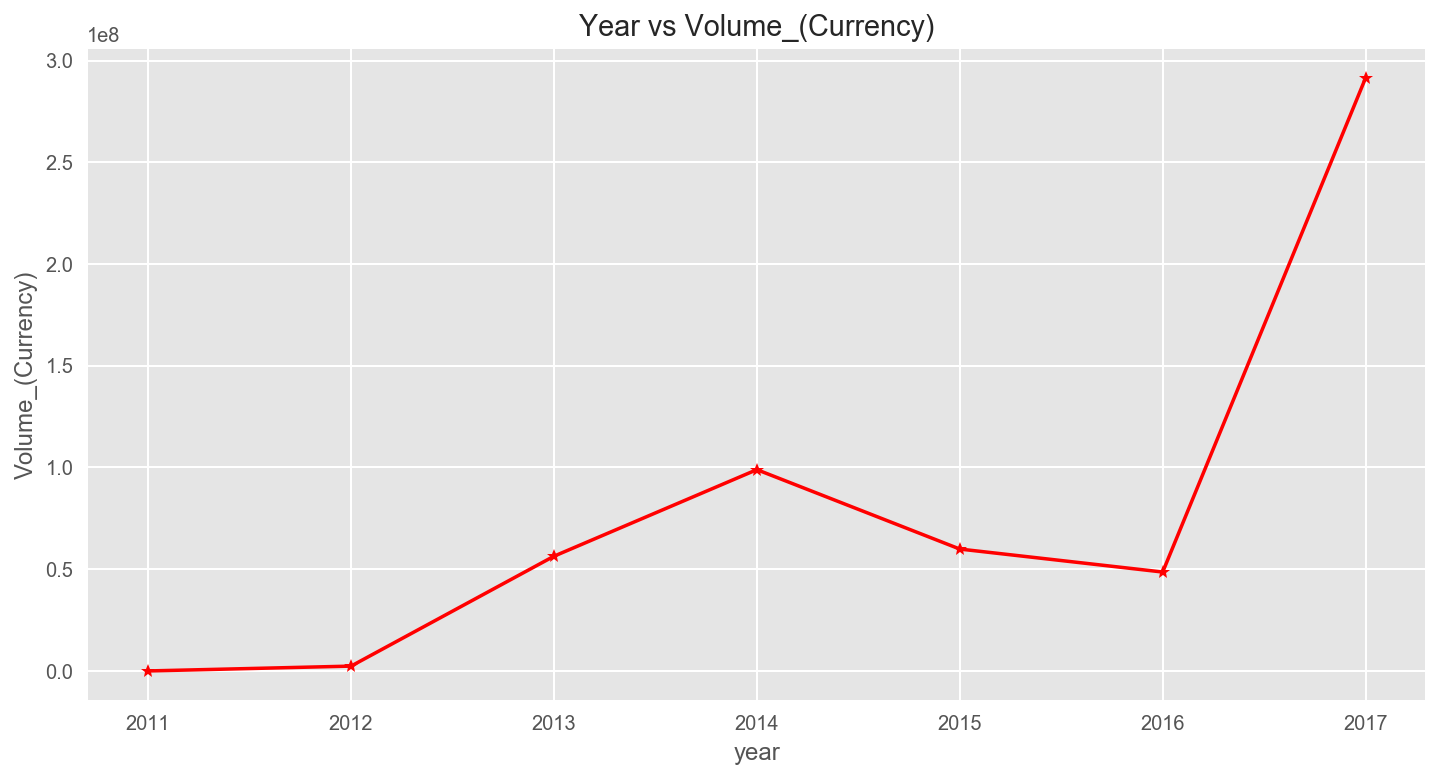

In [105]:
volume_currency_year = []
for year in range(2011, 2018):
    volume_currency_year.append(df.query("year == @year")["Volume_(Currency)"].sum())
plt.plot([i for i in df["year"].unique()], volume_btc_year, color = "r", marker = "*")
plt.title("Year vs Volume_(Currency)")
plt.xlabel("year")
plt.ylabel("Volume_(Currency)")
plt.show()

The trend is positive. 

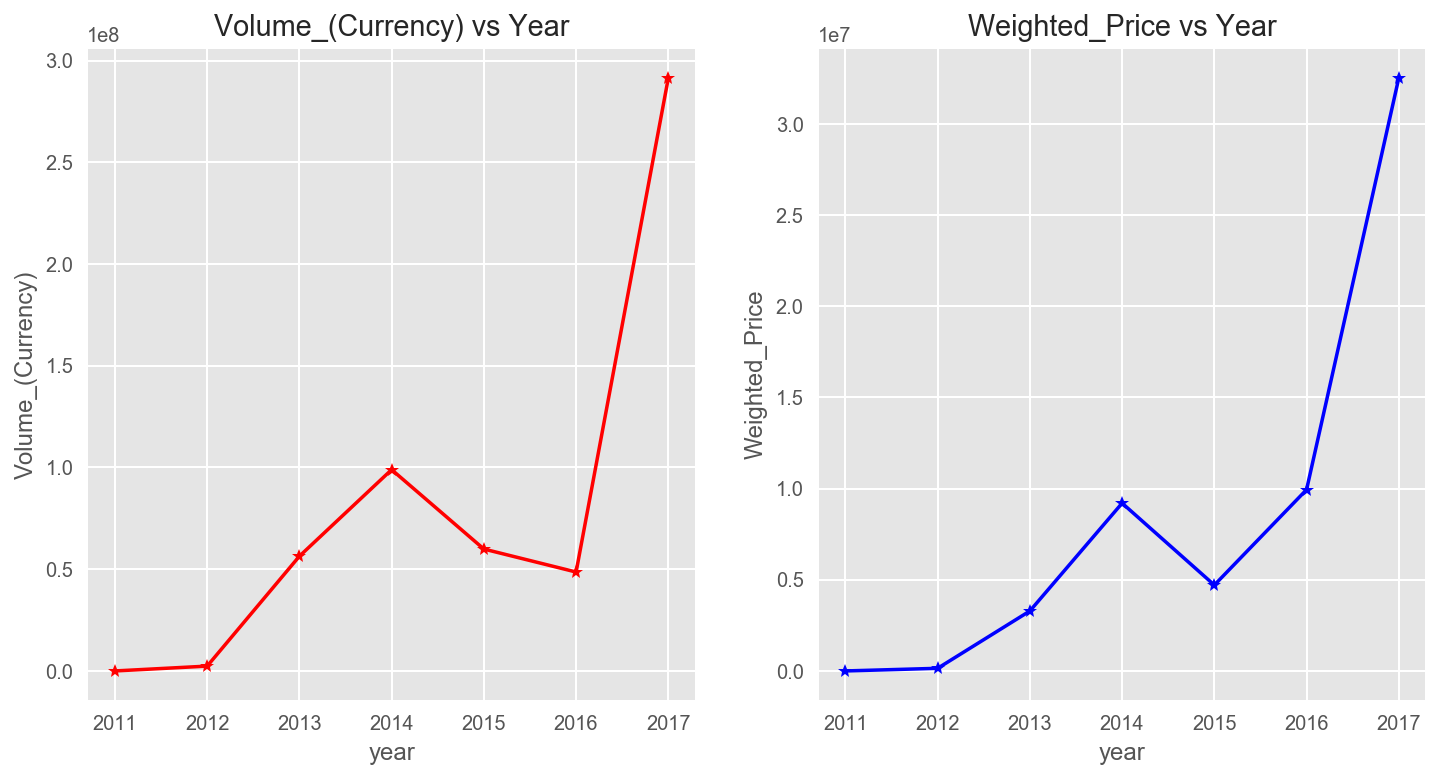

In [107]:
plt.subplot(1,2,1)
plt.plot([i for i in df["year"].unique()], volume_btc_year, color = "r", marker = "*")
plt.title("Volume_(Currency) vs Year")
plt.xlabel("year")
plt.ylabel("Volume_(Currency)")

plt.subplot(1,2,2)
plt.plot([i for i in df["year"].unique()], [j for j in wprice_years], color = "b", marker = "*")
plt.title("Weighted_Price vs Year")
plt.xlabel("year")
plt.ylabel("Weighted_Price")
plt.show()

Well, this proves there is correlation. The bigger the currency, the bigger the price. 

### How does the weighted price look like against Volume_(Currency)?

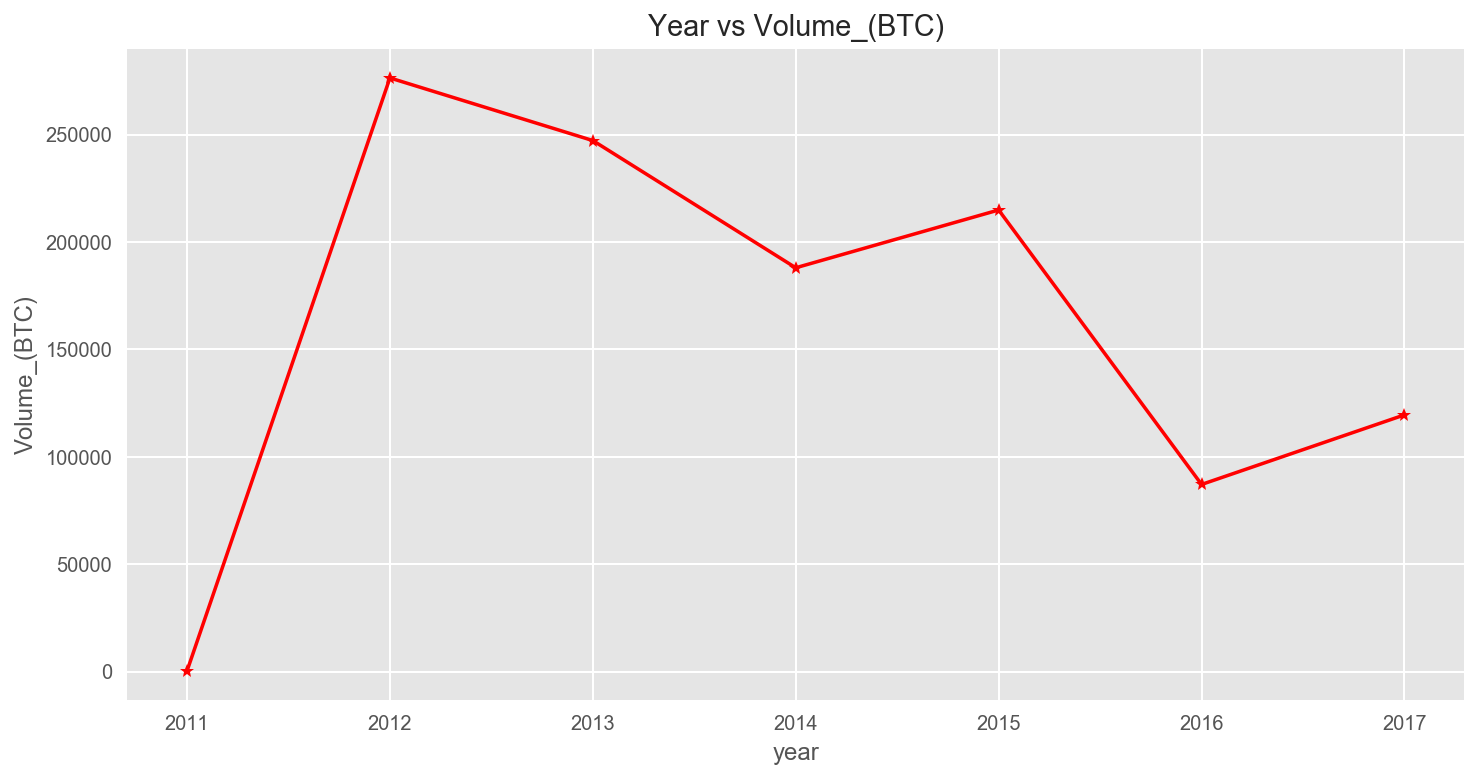

In [108]:
volume_btc_year = []
for year in range(2011, 2018):
    volume_btc_year.append(df.query("year == @year")["Volume_(BTC)"].sum())
plt.plot([i for i in df["year"].unique()], volume_btc_year, color = "r", marker = "*")
plt.title("Year vs Volume_(BTC)")
plt.xlabel("year")
plt.ylabel("Volume_(BTC)")
plt.show()

Honestly, I don't understand the relation. The Pearson coefficient between weighted_price and volume_btc is ~-1 which indicates negative slope. Ok, so the smaller the BTC gets, the bigger the weighted price? <br>
Let's plot it.

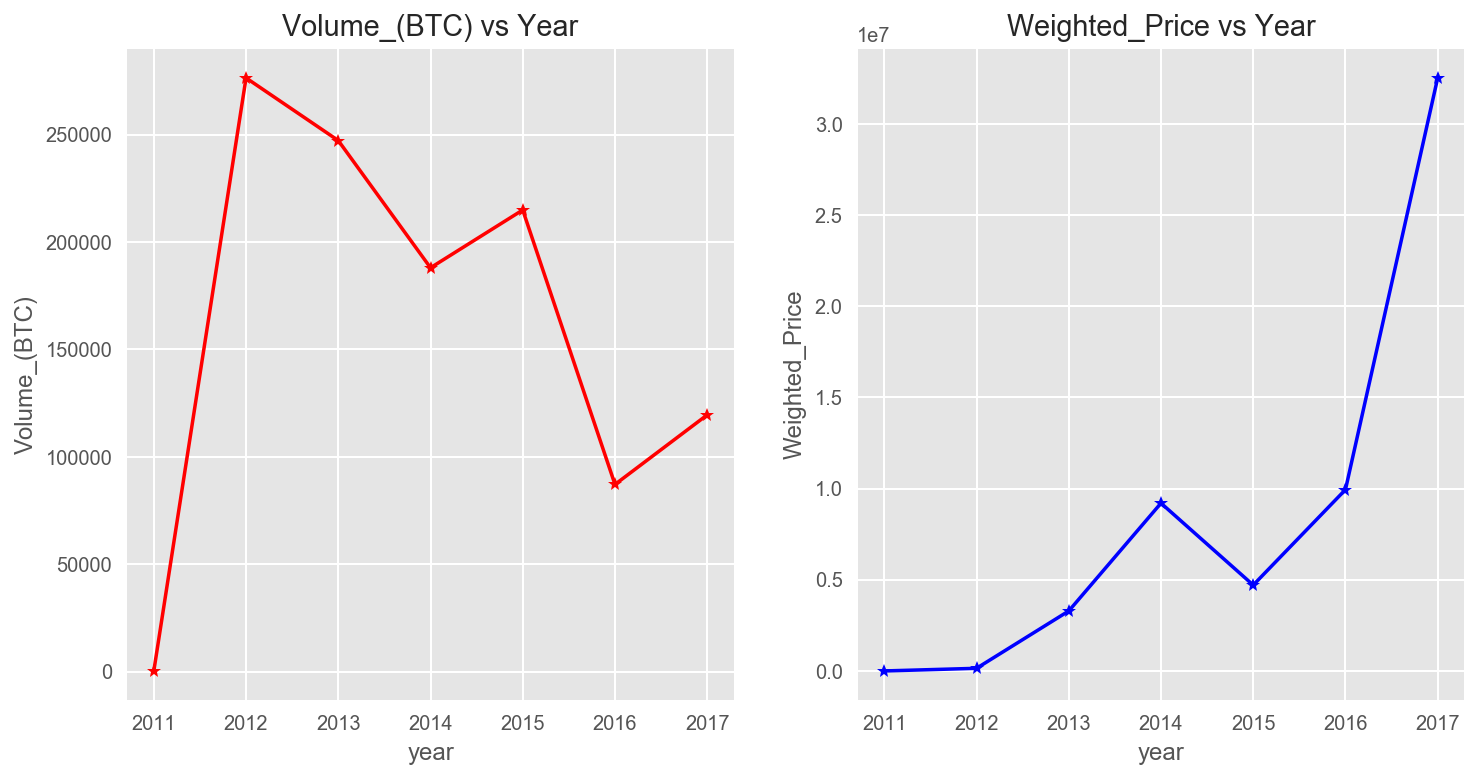

In [109]:
plt.subplot(1,2,1)
plt.plot([i for i in df["year"].unique()], volume_btc_year, color = "r", marker = "*")
plt.title("Volume_(BTC) vs Year")
plt.xlabel("year")
plt.ylabel("Volume_(BTC)")

plt.subplot(1,2,2)
plt.plot([i for i in df["year"].unique()], [j for j in wprice_years], color = "b", marker = "*")
plt.title("Weighted_Price vs Year")
plt.xlabel("year")
plt.ylabel("Weighted_Price")
plt.show()

Well, it seems like it. Tough in 2017 Volume BTC increased and Weighted Price also increased. There must be **cofounding**. 

In [116]:
print("Stats open")
df.drop(["Volume_(BTC)", "Volume_(Currency)", "Weighted_Price", "day", "hour", "minute", "month", "year"], axis = 1).describe()

Stats open


,Close,High,Low,Open
count,101529.000000,101529.000000,101529.000000,101529.000000
mean,589.232123,589.621608,588.807737,589.248056
std,882.963914,883.663354,882.197467,883.044400
min,4.140000,4.140000,4.140000,4.140000
25%,101.390000,101.490000,101.130000,101.340000
50%,362.500000,362.690000,362.090000,362.400000
75%,631.990000,632.000000,631.560000,631.940000
max,5842.140000,5846.430000,5839.640000,5846.430000


Data is almost equal. Do small changes affect the trend? <br>
** TODO: normalize data **

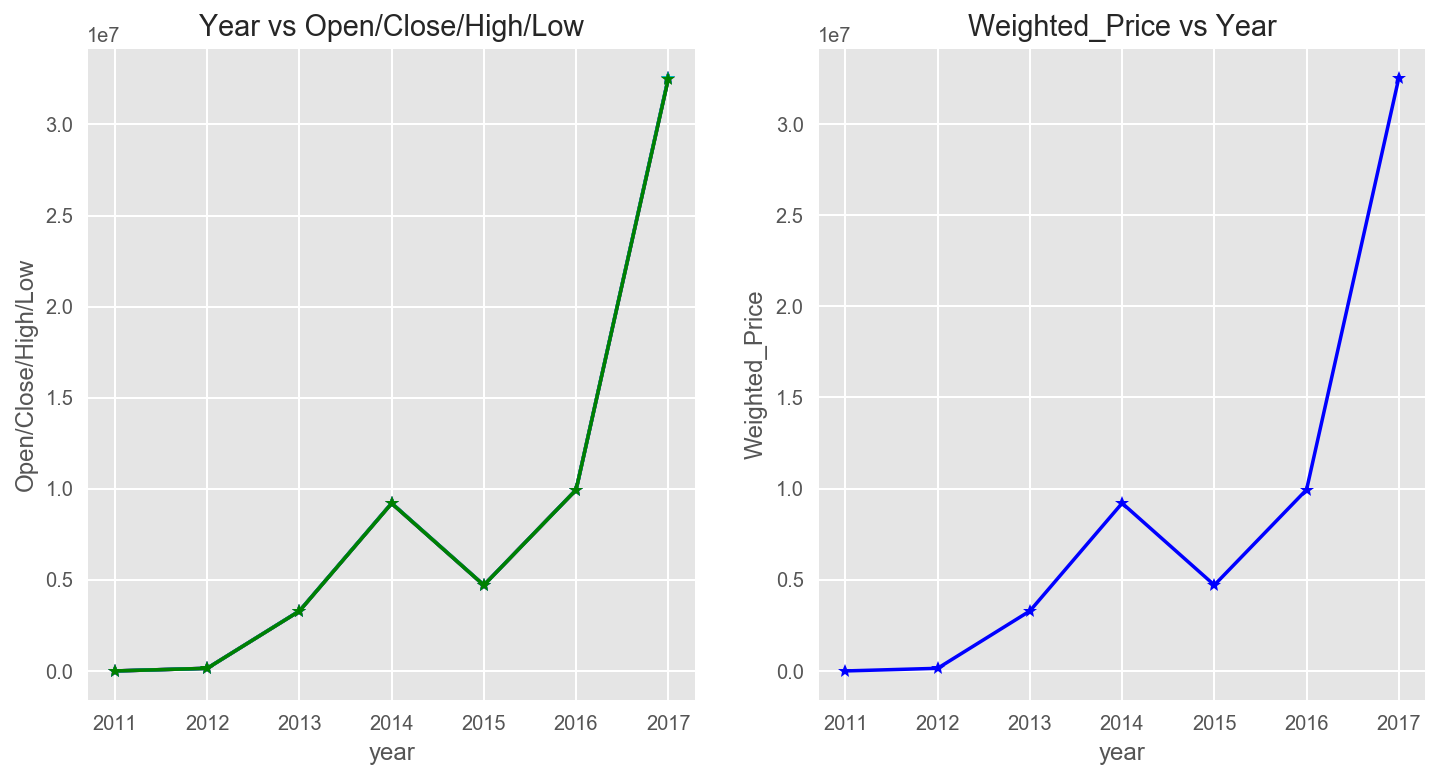

In [117]:
value_open_year = []
value_close_year = []
value_high_year = []
value_low_year = []
for year in range(2011, 2018):
    value_open_year.append(df.query("year == @year")["Open"].sum())
    value_close_year.append(df.query("year == @year")["Close"].sum())
    value_high_year.append(df.query("year == @year")["High"].sum())
    value_low_year.append(df.query("year == @year")["Low"].sum())

plt.subplot(1,2,1)
plt.plot([i for i in df["year"].unique()], value_open_year, color = "r", marker = "*")
plt.plot([i for i in df["year"].unique()], value_close_year, color = "b", marker = "*")
plt.plot([i for i in df["year"].unique()], value_high_year, color = "c", marker = "*")
plt.plot([i for i in df["year"].unique()], value_low_year, color = "g", marker = "*")
plt.title("Year vs Open/Close/High/Low")
plt.xlabel("year")
plt.ylabel("Open/Close/High/Low")

plt.subplot(1,2,2)
plt.plot([i for i in df["year"].unique()], [j for j in wprice_years], color = "b", marker = "*")
plt.title("Weighted_Price vs Year")
plt.xlabel("year")
plt.ylabel("Weighted_Price")
plt.show()

Ok. Unless I did something wrong, these features will only overfit the model.